In [43]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [44]:
# Wine veri setini yükle
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

# Veri setinin ilk birkaç satırını görüntüle
print(df.head())
print(df.describe())
print(df['target'].value_counts())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [45]:
X = df.iloc[:, :-1].values  # Özellikler
y = df['target'].values     # Hedef değişken 

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Veriyi ölçeklendirelim
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [46]:
# K-NN sınıflandırıcı modelini oluştur
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Modeli test verisi üzerinde değerlendir
y_pred = model.predict(X_test)

# Sonuçları yazdır
print(f"Doğruluk Skoru: {accuracy_score(y_test, y_pred):.2f}")
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))



Doğruluk Skoru: 0.96
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



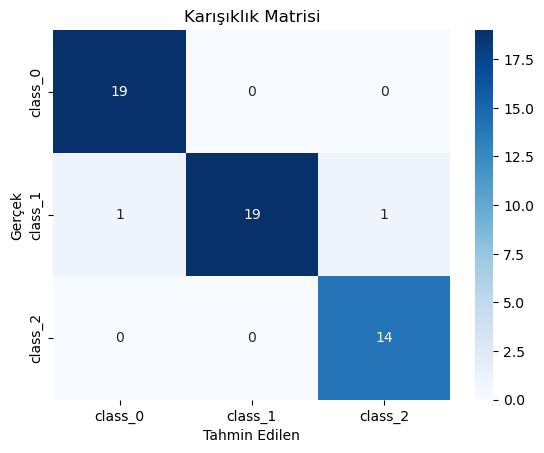

In [47]:
# Karışıklık matrisini oluştur ve görselleştir
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi')
plt.show()


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

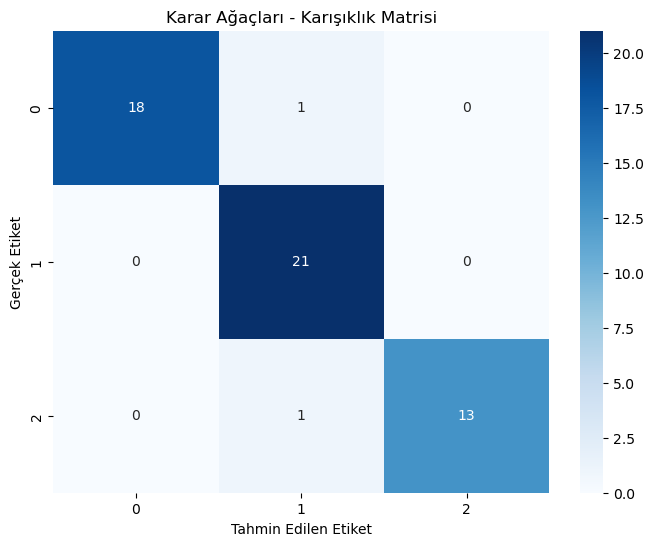

In [48]:
#karar ağacı

import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Wine veri setini yükleyin
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

# Veri setinin ilk birkaç satırını görüntüle
print(df.head())
print(df.describe())
print(df['target'].value_counts())

# Özellikler ve hedef değişkeni ayırın
X = df.iloc[:, :-1].values  # Özellikler
y = df['target'].values     # Hedef değişken 

# Veriyi eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Veriyi ölçeklendirelim
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Karar Ağaçları modelini oluşturun
decision_tree_model = DecisionTreeClassifier()

# Modeli eğitim verisi ile eğitin
decision_tree_model.fit(X_train, y_train)

# Test verisi ile tahmin yapın
y_pred_tree = decision_tree_model.predict(X_test)

# Sonuçları yazdırın
print("Karar Ağaçları - Doğruluk Skoru: {:.2f}".format(accuracy_score(y_test, y_pred_tree)))
print("Karar Ağaçları - Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_tree))

# Karışıklık Matrisi
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Karışıklık Matrisi Grafiği
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[str(i) for i in range(len(np.unique(y)))],
            yticklabels=[str(i) for i in range(len(np.unique(y)))])
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Karar Ağaçları - Karışıklık Matrisi')
plt.show()


Naive Bayes - Doğruluk Skoru: 1.00
Naive Bayes - Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



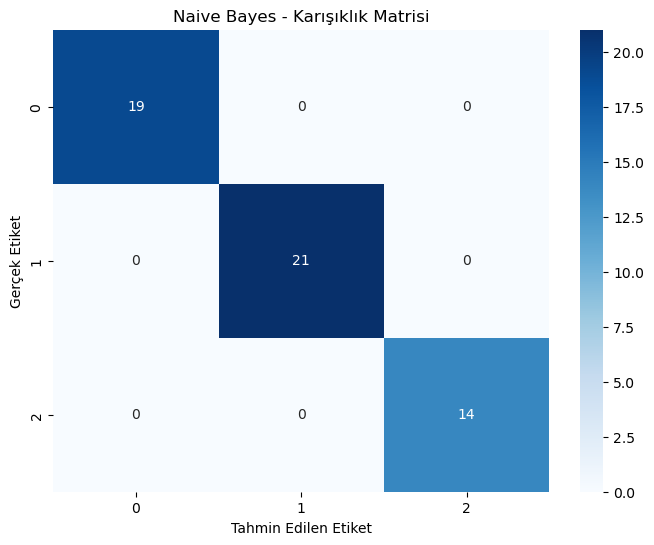

In [54]:
# navie bayes
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


wine=load_wine()
df=pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target']=wine.target

#özellikler ve hedef değişken
x=df.iloc[:, :-1]
y=df['target'].values


#eğitim ve test ayır
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=42)


#veri ölçeklendirme scaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)


#naive bayes modeli oluştur.
naive_bayes_model= GaussianNB()

#modeli eğitim verisi ile eğit
naive_bayes_model.fit(x_train, y_train)

#test verisi ile tahmin yap
y_pred_nb= naive_bayes_model.predict(x_test)


# Sonuçları yazdır
print("Naive Bayes - Doğruluk Skoru: {:.2f}".format(accuracy_score(y_test, y_pred_nb)))
print("Naive Bayes - Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_nb))



# Karışıklık Matrisi
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Karışıklık Matrisi Grafiği
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=[str(i) for i in np.unique(y)],
            yticklabels=[str(i) for i in np.unique(y)])
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Naive Bayes - Karışıklık Matrisi')
plt.show()
